### Data about
- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

### Import libraries

In [510]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



#### Remove Warning

In [511]:
import warnings
warnings.simplefilter("ignore")

#### Reading the file

In [512]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Data Information

In [513]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [514]:
df.customerID.nunique()

7043

In [515]:
df.duplicated().sum()

0

In [516]:
df.drop('customerID',axis=1,inplace=True)

In [517]:
df.duplicated().sum()

22

In [518]:
df[df.duplicated()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
964,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.7,Yes
1338,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
1491,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
1739,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.9,Yes
1932,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.2,No
2713,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
2892,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,20.45,No
3301,Female,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.6,Yes
3754,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
4098,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,20.2,Yes


### Data Processing And Cleaning

In [519]:
df=df.drop_duplicates()

In [520]:
df.duplicated().sum()

0

In [521]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [522]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [523]:
df.TotalCharges.nunique()

6531

In [524]:
df[~df['TotalCharges'].str.contains('\d')] ###regex

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [525]:
df[~df['TotalCharges'].str.contains('\d')].shape 

(11, 20)

In [526]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'] , errors='coerce')

In [527]:
df['TotalCharges'].describe()

count    7010.000000
mean     2290.353388
std      2266.820832
min        18.800000
25%       408.312500
50%      1403.875000
75%      3807.837500
max      8684.800000
Name: TotalCharges, dtype: float64

In [528]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [529]:
df["TotalCharges"].fillna(df["tenure"]*df["MonthlyCharges"],inplace=True)

In [530]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

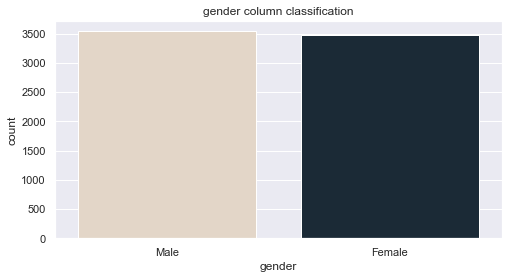

In [531]:
sns.countplot(x = 'gender', data = df,  
            order = df['gender'].value_counts().index,
            palette = 'ch:start=9,rot=-.7')
plt.title('gender column classification')
plt.show()

Text(0.5, 1.0, 'percentage of gender ')

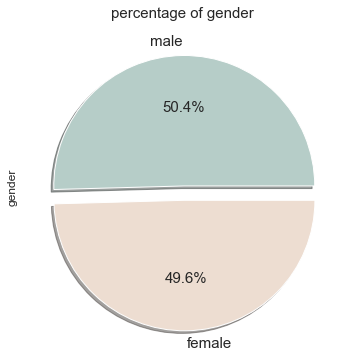

In [532]:
myexplode = [0.01, 0.1]
a = (df['gender'].value_counts()*100.0 /len(df)).plot.pie(autopct='%.1f%%', labels = ['male', 'female'],figsize =(6,6),
colors=["#B6CDC8","#EDDDD1"], fontsize = 15,explode = myexplode, shadow = True )                                                                           
a.set_title('percentage of gender ', fontsize = 15)

Text(0.5, 1.0, 'percentage of Senior Citizens')

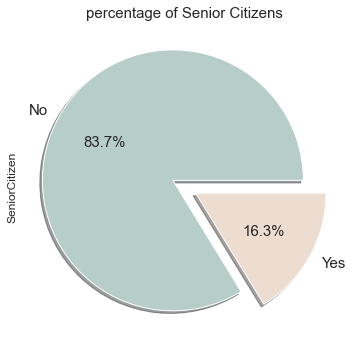

In [533]:
myexplode = [0.1, 0.1]
a = (df['SeniorCitizen'].value_counts(normalize=True)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(6,6),
colors=["#B6CDC8","#EDDDD1"], fontsize = 15,explode = myexplode, shadow = True )                                                                           
a.set_title('percentage of Senior Citizens', fontsize = 15)

Text(0.5, 1.0, 'percentage of Partner')

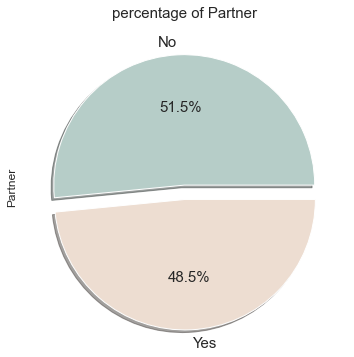

In [534]:
myexplode = [0.01 , 0.1]
a = (df['Partner'].value_counts(normalize=True)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(6,6),
colors=["#B6CDC8","#EDDDD1"], fontsize = 15,explode = myexplode, shadow = True )                                                                           
a.set_title('percentage of Partner', fontsize = 15)

Text(0.5, 1.0, 'percentage of Dependents')

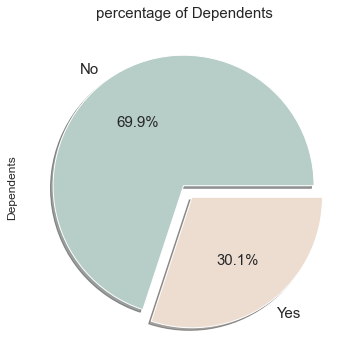

In [535]:
myexplode = [0.01 , 0.1]
a = (df['Dependents'].value_counts(normalize=True)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(6,6),
colors=["#B6CDC8","#EDDDD1"], fontsize = 15,explode = myexplode, shadow = True )                                                                           
a.set_title('percentage of Dependents', fontsize = 15)

Text(0.5, 1.0, 'percentage of PhoneService')

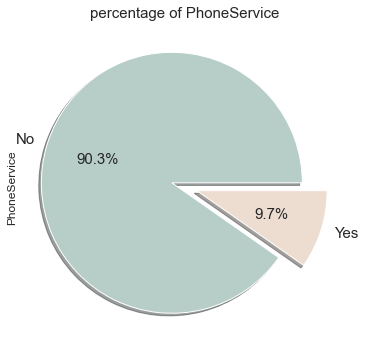

In [536]:
myexplode = [0.1 , 0.1]
a = (df['PhoneService'].value_counts(normalize=True)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(6,6),
colors=["#B6CDC8","#EDDDD1"], fontsize = 15,explode = myexplode, shadow = True )                                                                           
a.set_title('percentage of PhoneService', fontsize = 15)

Text(0.5, 1.0, 'percentage of Churn')

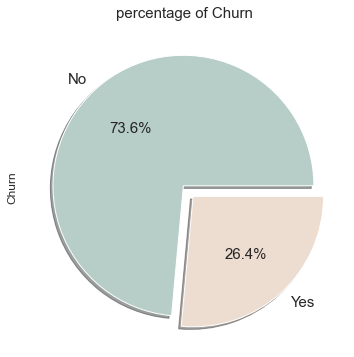

In [537]:
myexplode = [0.01 , 0.1]
a = (df['Churn'].value_counts(normalize=True)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(6,6),
colors=["#B6CDC8","#EDDDD1"], fontsize = 15,explode = myexplode, shadow = True )                                                                           
a.set_title('percentage of Churn', fontsize = 15)

<AxesSubplot: xlabel='MultipleLines', ylabel='count'>

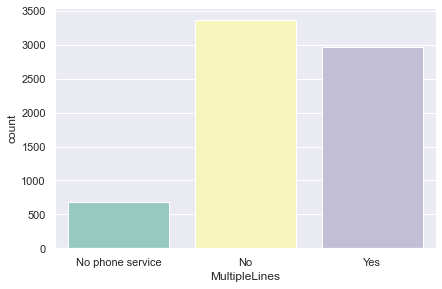

In [538]:
plt.figure(figsize = (15,15))

#plt.subplot(3,2,1)
#sns.countplot(x = 'gender', palette = 'Set2', data = df)

#plt.subplot(3,2,2)
#sns.countplot(x = 'SeniorCitizen', palette = 'Set2', data = df)

#plt.subplot(3,2,3)
#sns.countplot(x = 'Partner', palette = 'Set2', data = df)

#plt.subplot(3,2,4)
#sns.countplot(x = 'Dependents', palette = 'Set2', data = df)

#plt.subplot(3,2,5)
#sns.countplot(x = 'PhoneService', palette = 'Set2', data = df)

plt.subplot(3,2,6)
sns.countplot(x = 'MultipleLines', palette = 'Set3', data = df)

<AxesSubplot: xlabel='StreamingTV', ylabel='count'>

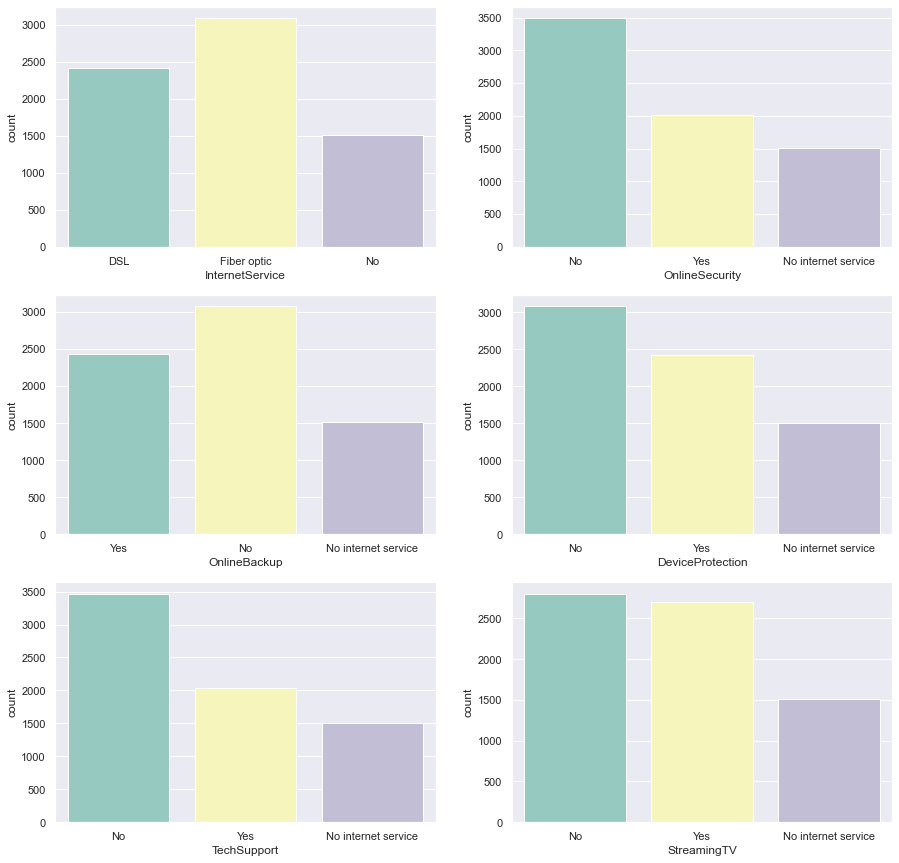

In [539]:
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.countplot(x = 'InternetService', palette = 'Set3', data = df)

plt.subplot(3,2,2)
sns.countplot(x = 'OnlineSecurity', palette = 'Set3', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'OnlineBackup', palette = 'Set3', data = df)

plt.subplot(3,2,4)
sns.countplot(x = 'DeviceProtection', palette = 'Set3', data = df)

plt.subplot(3,2,5)
sns.countplot(x = 'TechSupport', palette = 'Set3', data = df)

plt.subplot(3,2,6)
sns.countplot(x = 'StreamingTV', palette = 'Set3', data = df)

<AxesSubplot: xlabel='Churn', ylabel='count'>

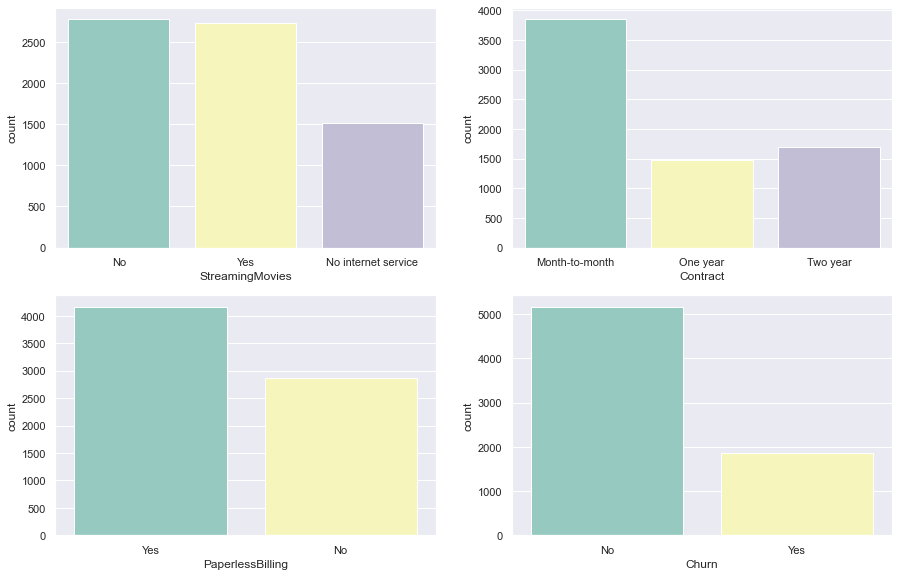

In [540]:
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.countplot(x = 'StreamingMovies', palette = 'Set3', data = df)

plt.subplot(3,2,2)
sns.countplot(x = 'Contract', palette = 'Set3', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'PaperlessBilling', palette = 'Set3', data = df)

plt.subplot(3,2,4)
sns.countplot(x = 'Churn', palette = 'Set3', data = df)

<AxesSubplot: xlabel='PaymentMethod', ylabel='count'>

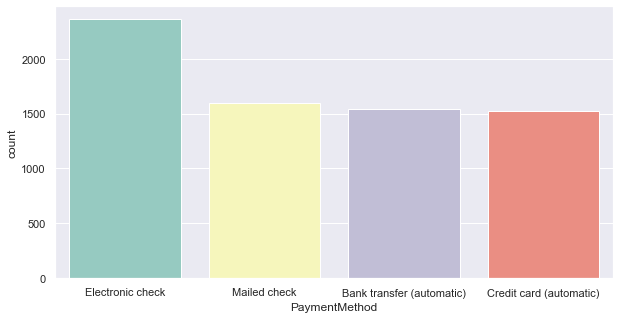

In [541]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'PaymentMethod', palette = 'Set3', data = df)

<AxesSubplot: >

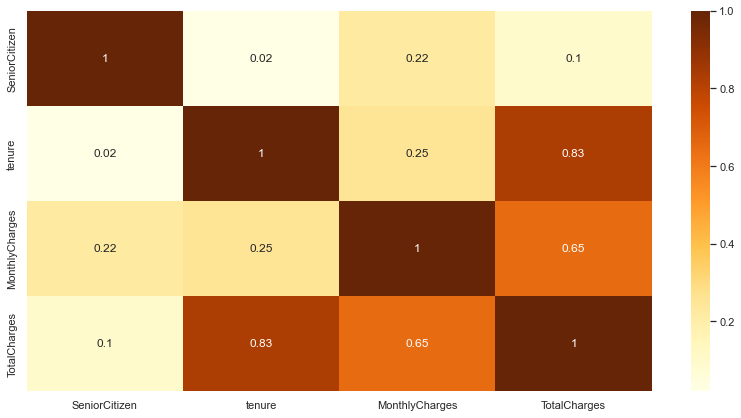

In [542]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

In [543]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [544]:
df['MultipleLines']=df['MultipleLines'].replace(('No phone service'),('No'))

In [545]:
df['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [546]:
df['OnlineSecurity']=df['OnlineSecurity'].replace(('No internet service'),('No'))

In [547]:
df['MultipleLines'].unique()

array(['No', 'Yes'], dtype=object)

In [548]:
df['OnlineSecurity'].unique()

array(['No', 'Yes'], dtype=object)

In [549]:
df[df['Churn']=='Yes'].head(40)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
18,Female,0,Yes,Yes,10,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes
20,Male,1,No,No,1,No,No,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
22,Male,0,No,No,1,Yes,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
26,Male,0,Yes,Yes,47,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes
27,Male,0,Yes,Yes,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes


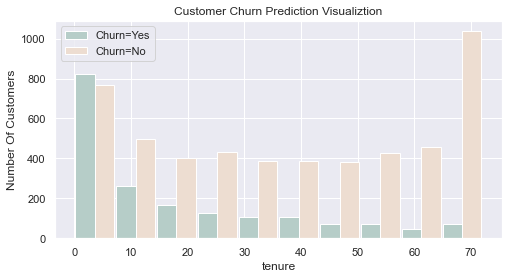

In [550]:
tenure_churn_no = df[df.Churn=='No'].tenure
tenure_churn_yes = df[df.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=["#B6CDC8","#EDDDD1"],label=['Churn=Yes','Churn=No'])
plt.legend()


In [551]:
df.tenure.describe()

count    7021.000000
mean       32.469449
std        24.534965
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [552]:
df.describe(include='O')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021
unique,2,2,2,2,2,3,2,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3541,3619,4911,6339,4050,3090,5002,3080,3087,3465,2802,2777,3853,4161,2359,5164


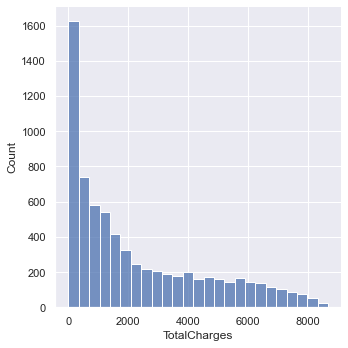

In [553]:
sns.set(rc={"figure.figsize": (8, 4)})
sns.displot(df['TotalCharges'])


In [554]:
df['Churn'].value_counts()

No     5164
Yes    1857
Name: Churn, dtype: int64

In [555]:
df['Churn'].value_counts(normalize=True).round(2)

No     0.74
Yes    0.26
Name: Churn, dtype: float64

In [556]:
le = LabelEncoder()
le.fit(df['Churn'])
le.classes_
df['Churn'] = le.transform(df['Churn'])

In [557]:
df.groupby('gender')['Churn'].mean()

gender
Female    0.268391
Male      0.260661
Name: Churn, dtype: float64

In [558]:
df.drop('gender',axis=1,inplace=True)

In [559]:
df['Churn'].value_counts()

0    5164
1    1857
Name: Churn, dtype: int64

<AxesSubplot: >

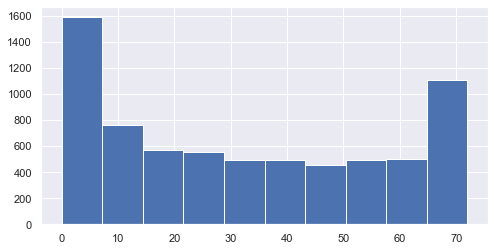

In [560]:
df['tenure'].hist()

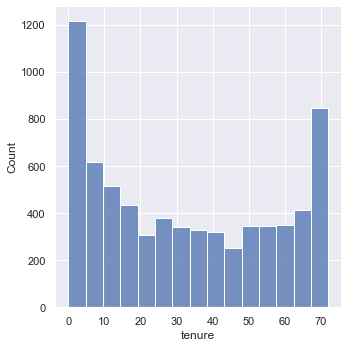

In [561]:
sns.set(rc={"figure.figsize": (8, 4)})
sns.displot(df['tenure'])

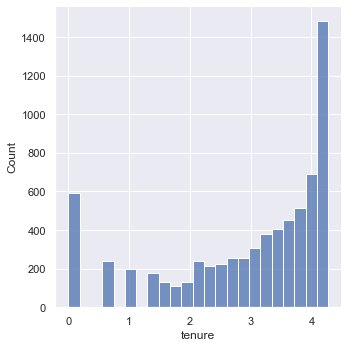

In [562]:
df1=df['tenure']
df2=np.log(df1)
sns.set(rc={"figure.figsize": (8, 4)})
sns.displot(df2)

In [563]:
def unique_values(df):
       for col in df:
            if df[col].dtypes=='object':
                print(f'{col}: {df[col].unique()}') 
                
unique_values(df)                

Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [564]:
df['TechSupport']=df['TechSupport'].replace(('No internet service'),('No'))

In [565]:
df['StreamingTV']=df['StreamingTV'].replace(('No internet service'),('No'))

In [566]:
df['StreamingMovies']=df['StreamingMovies'].replace(('No internet service'),('No'))

In [567]:
df.replace('No internet service','No',inplace=True)

In [568]:
def unique_values(df):
       for col in df:
            if df[col].dtypes=='object':
                print(f'{col}: {df[col].unique()}') 
                
unique_values(df) 

Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [569]:
yes_no = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

In [570]:
def unique_values(df):
       for col in df:
            if df[col].dtypes=='object':
                print(f'{col}: {df[col].unique()}') 
                
unique_values(df) 

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [571]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [572]:
for col in df:
    print(f'{col}: {df[col].unique()}') 


SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


<AxesSubplot: >

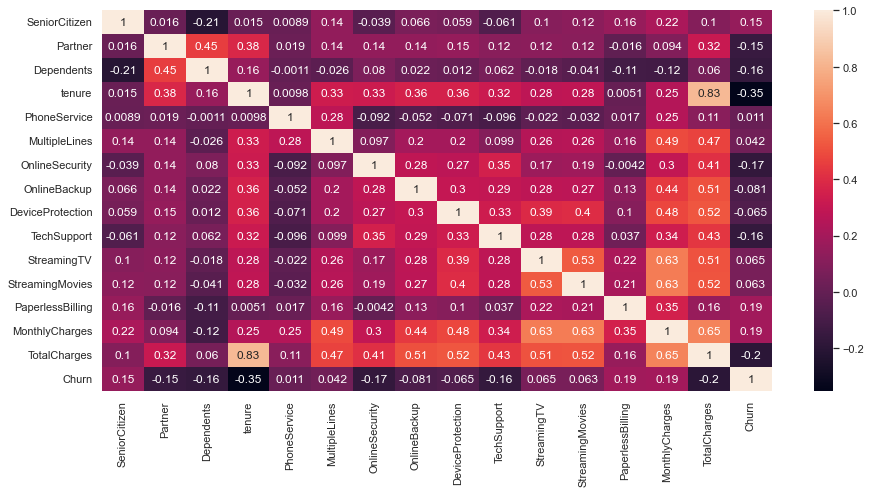

In [573]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)


In [574]:
df = pd.get_dummies(df, columns=['InternetService','Contract','PaymentMethod'])
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [575]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,1,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [576]:
df.dtypes

SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int32
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
Contract_Month-to-month        

In [577]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,1,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [578]:
scale = ['tenure','MonthlyCharges','TotalCharges']

scaler = StandardScaler()
df[scale] = scaler.fit_transform(df[scale])


In [579]:
for col in df:
    print(f'{col}: {df[col].unique()}')

SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [-1.28272817  0.06238689 -1.2419671   0.51075858 -0.99740073 -0.42674586
 -0.9158786  -0.18217948  1.20369664 -0.79359542 -0.67131223  1.04065239
  0.67380283 -0.30446267  1.48902408  0.79608602  1.5705462  -0.46750692
 -0.83435648 -0.10065736  0.5922807   1.61130727 -0.63055117 -0.22294054
 -1.11968392  0.55151964 -0.87511754  1.52978514  1.2444577   0.42923645
 -0.71207329  1.12217452 -0.58979011  1.36674089 -0.95663967 -1.20120604
 -0.05989629  0.71456389  1.28521877  0.95913027 -1.03816179  0.38847539
  0.10314796  0.63304177 -0.14141842  1.32597983  0.22543114  1.44826302
 -0.01913523  0.9183692   0.18467008  0.14390902  0.34771433 -1.07892285
 -1.16044498  0.02162583  1.40750195 -0.38598479  0.99989133  1.16293558
 -0.75283436 -0.50826798  0.83684708  0.30695327  1.08141345 -0.34522373
  0.46999752 -0.54902904  0.87760814  0.75532495 -0.26370161 -1.32348923
  0.26619221]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineS

In [580]:
df.shape

(7021, 26)

<AxesSubplot: >

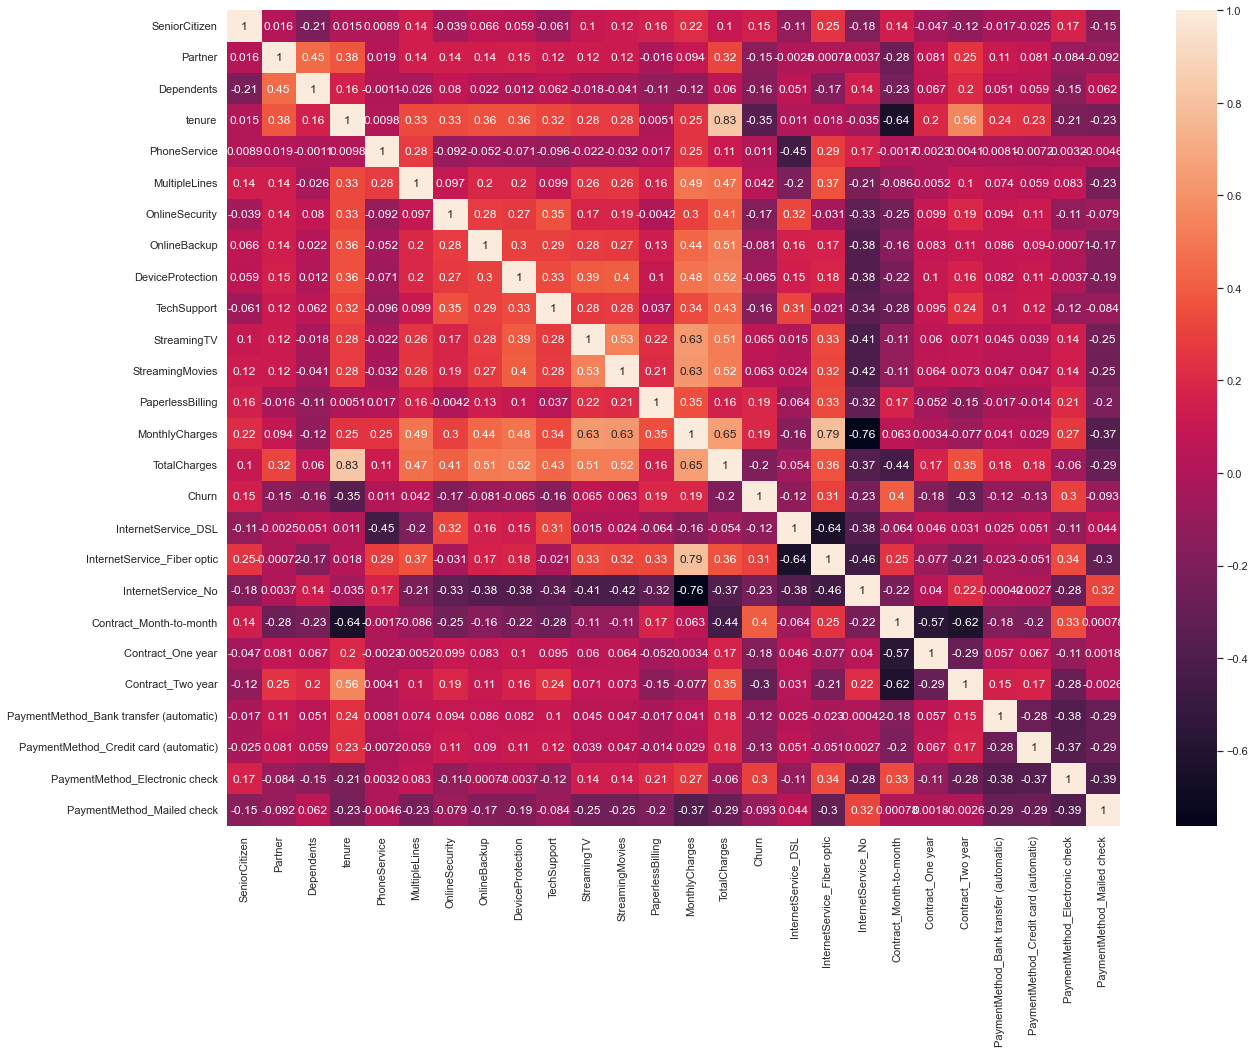

In [581]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

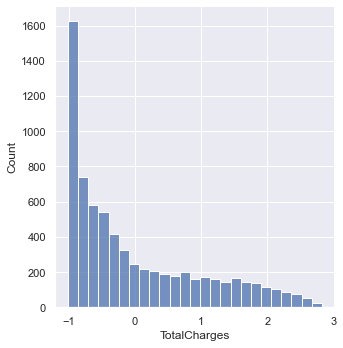

In [582]:
sns.set(rc={"figure.figsize": (8, 4)})
sns.displot(df['TotalCharges'])

<AxesSubplot: >

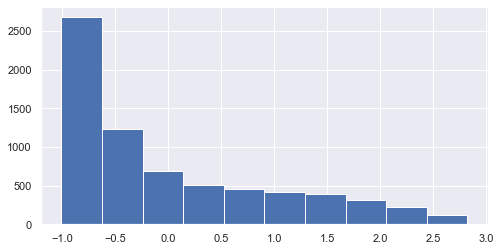

In [583]:
df1=df['TotalCharges']
plt.figure
df1.hist()


<AxesSubplot: >

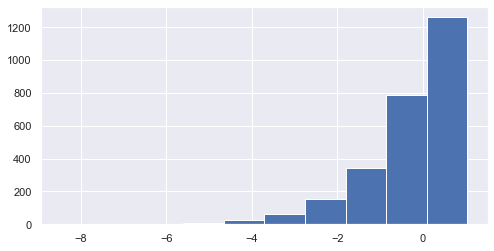

In [584]:
df1=df['TotalCharges']
df2=np.log(df1)
plt.figure
df2.hist()


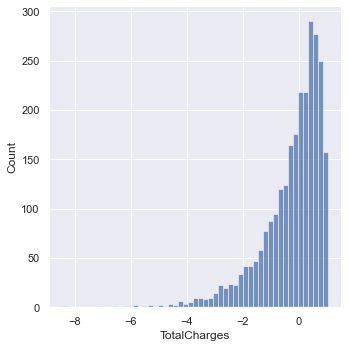

In [585]:
df1=df['TotalCharges']
df2=np.log(df1)
sns.set(rc={"figure.figsize": (8, 4)})
sns.displot(df2)

In [586]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,-1.282728,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0.062387,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,-1.241967,1,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0.510759,0,0,1,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,-1.241967,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [587]:
X=df.drop(['Churn'],axis=1)

In [588]:
y=df['Churn']

In [589]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  shuffle=True, random_state=42)

# print('X_train \n' , X_train)
# print('X_test \n' , X_test)
# print('y_train \n' ,y_train)
# print('y_test \n' , y_test)

In [590]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='liblinear',C=1.0,max_iter=100,random_state=33)
LogisticRegressionModel.fit(X_train, y_train)

#Calculating Details
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))
print('LogisticRegressionModel Classes are : ' , LogisticRegressionModel.classes_)
print('LogisticRegressionModel No. of iteratios is : ' , LogisticRegressionModel.n_iter_)
# print('----------------------------------------------------')

#Calculating Prediction
y_pred = LogisticRegressionModel.predict(X_test)
y_pred_prob = LogisticRegressionModel.predict_proba(X_test)


#----------------------------------------------------
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

c=accuracy_score(y_test, y_pred)
c




LogisticRegressionModel Train Score is :  0.8091168091168092
LogisticRegressionModel Test Score is :  0.7935943060498221
LogisticRegressionModel Classes are :  [0 1]
LogisticRegressionModel No. of iteratios is :  [6]
Confusion Matrix is : 
 [[923 130]
 [160 192]]


0.7935943060498221